#Problem Statement:
Yulu, India's leading micro-mobility service provider, offers shared electric cycles for daily commutes through a user-friendly mobile app. Despite its mission to eliminate traffic congestion and provide safe, affordable, and convenient commuting solutions, Yulu has recently faced significant dips in its revenues. The company has engaged a consulting firm to analyze the factors influencing the demand for their shared electric cycles. The goal is to identify the key determinants of demand and provide actionable insights to help Yulu enhance its service offerings and boost usage rates.

#Download Dataset

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2024-06-19 21:13:47--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.129, 13.224.9.103, 13.224.9.181, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089’

bike_sharing.csv?16 100%[===================>] 633.16K   575KB/s    in 1.1s    

2024-06-19 21:13:49 (575 KB/s) - ‘bike_sharing.csv?1642089089’ saved [648353/648353]



#Import all essential Python Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, expon, poisson
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import ttest_ind, shapiro, levene, f_oneway, chi2_contingency

In [4]:
data = pd.read_csv('bike_sharing.csv?1642089089')

In [5]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
data.shape

(10886, 12)

In [7]:
data.ndim

2

In [8]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#Checking for null values

In [9]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Convert datetime column to datetime type and extract additional features

In [12]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['dayofweek'] = data['datetime'].dt.dayofweek
data['month'] = data['datetime'].dt.month

In [13]:
print(data.describe())

                            datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000 

# Correlation Analysis

In [14]:
correlation_matrix = data.corr()
print(correlation_matrix['count'].sort_values(ascending=False))

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
datetime      0.310187
month         0.166862
season        0.163439
windspeed     0.101369
workingday    0.011594
dayofweek    -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64


# Visualization
# Distribution of count

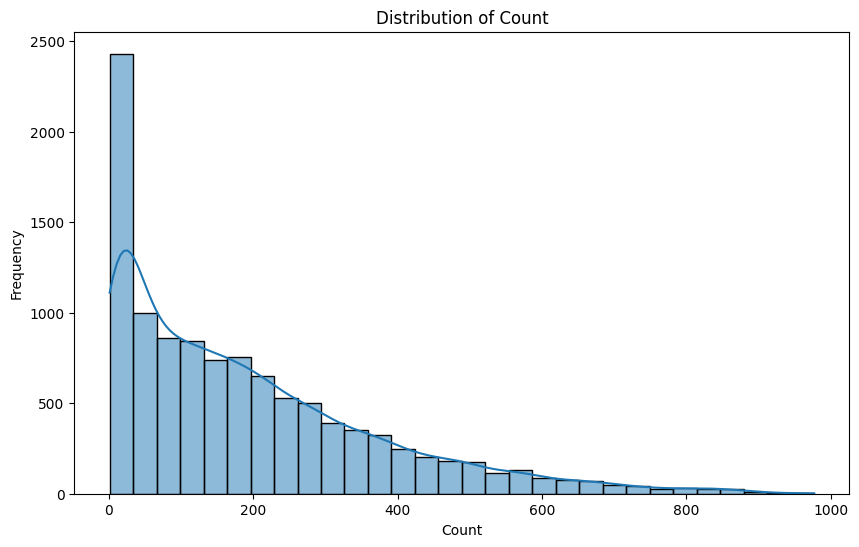

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['count'], bins=30, kde=True)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

# Count vs. Season

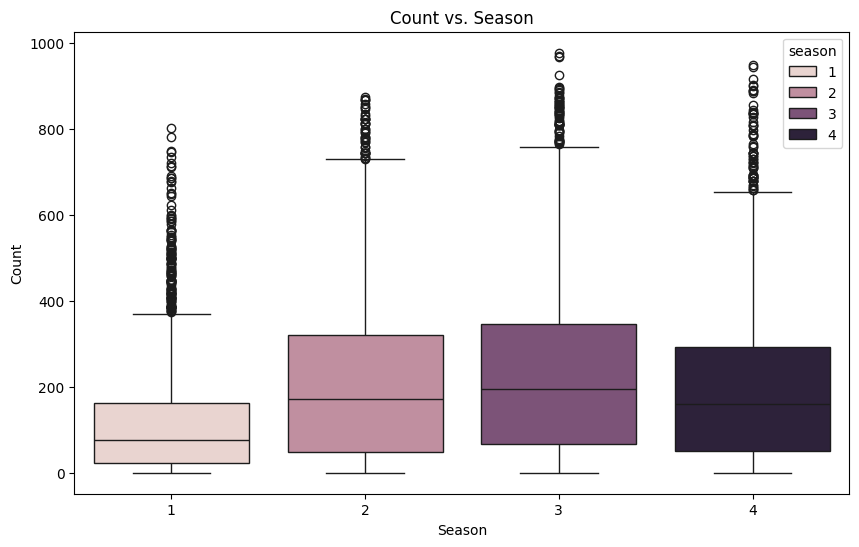

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=data, hue='season')
plt.title('Count vs. Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Count vs. Weather

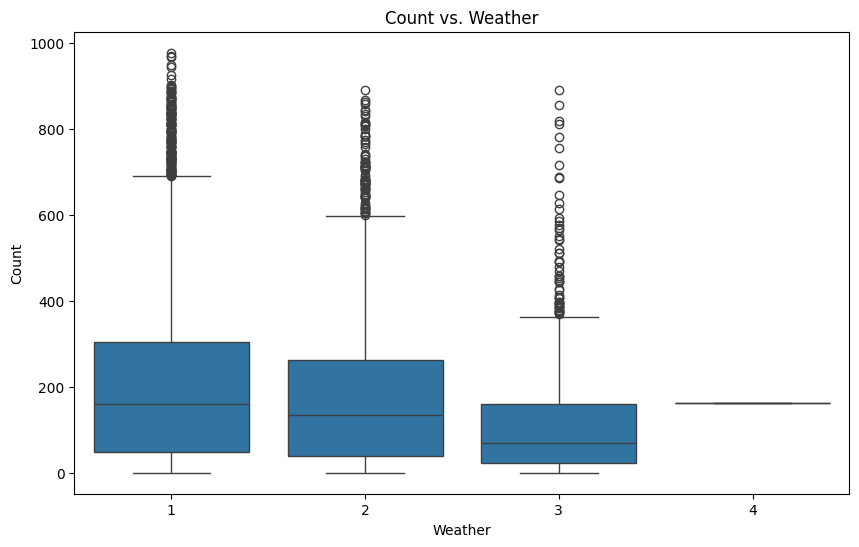

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=data)
plt.title('Count vs. Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

# Count vs. Workingday

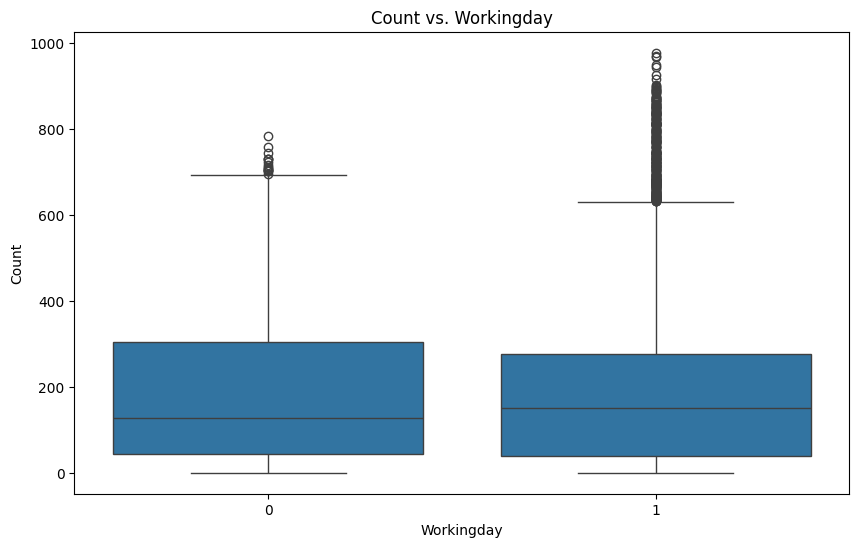

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='count', data=data)
plt.title('Count vs. Workingday')
plt.xlabel('Workingday')
plt.ylabel('Count')
plt.show()

In [24]:
duplicates = data.duplicated()
print(f"Number of duplicate records: {duplicates.sum()}")

Number of duplicate records: 0


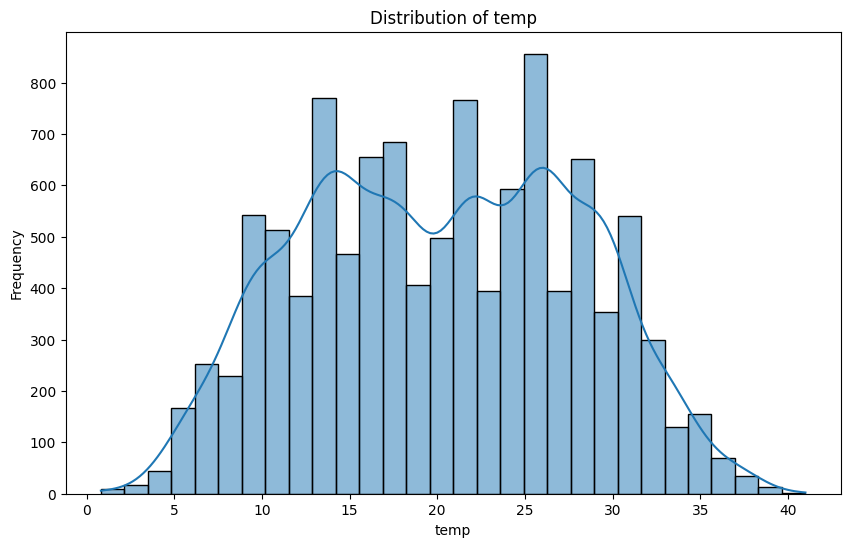

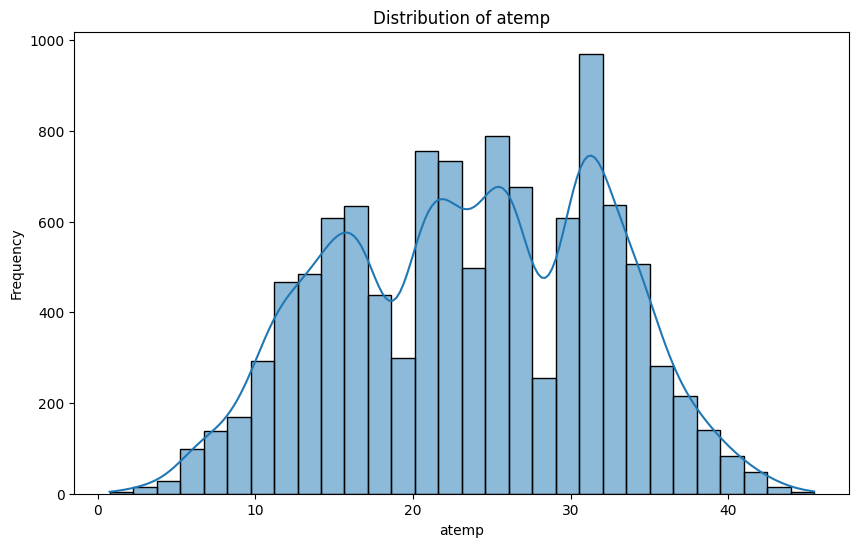

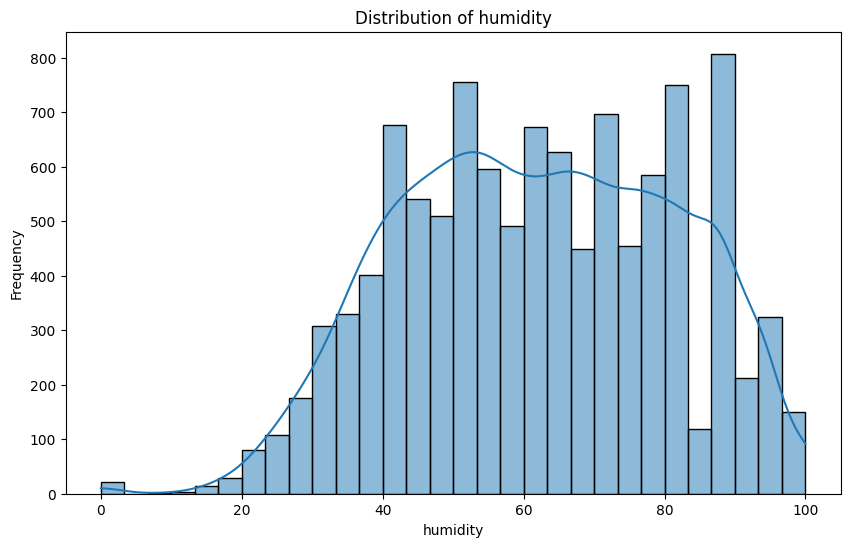

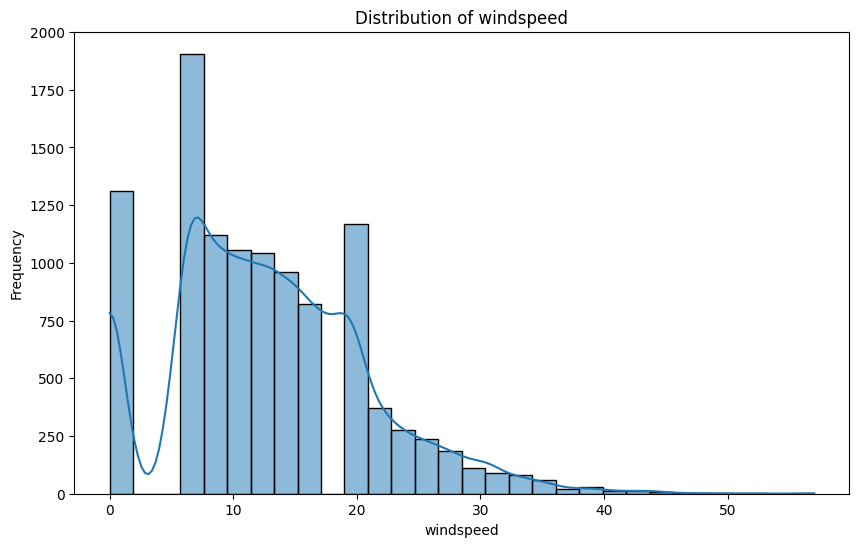

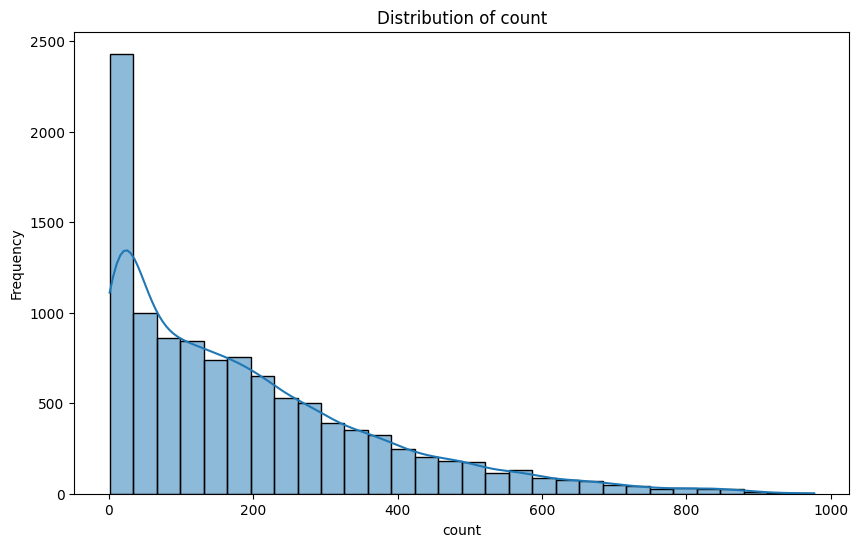

In [25]:
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Distribution of categorical features

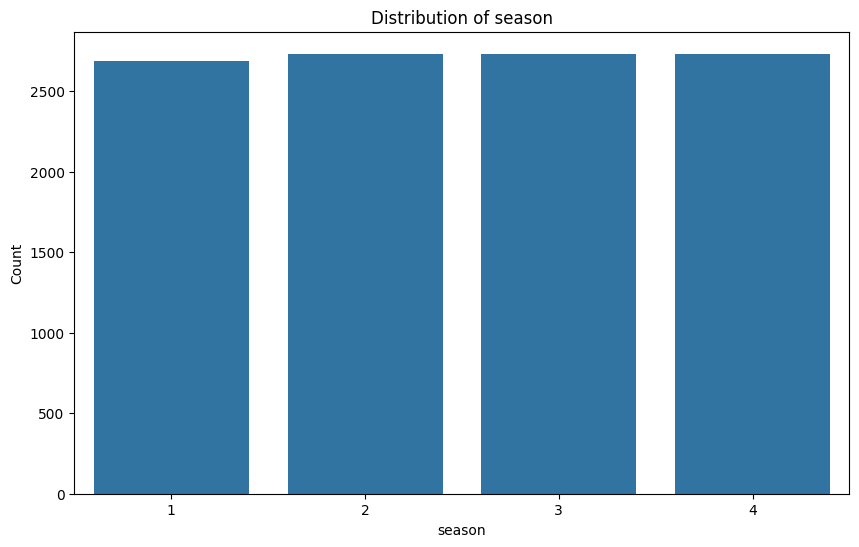

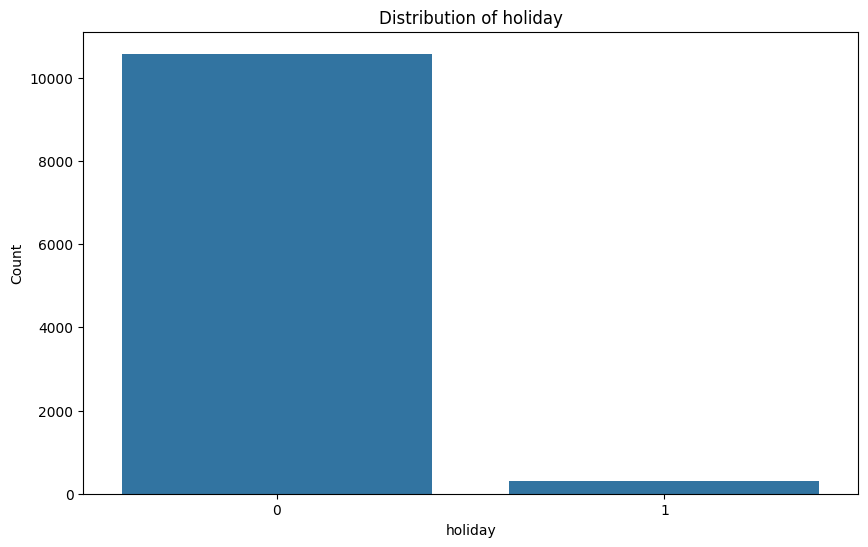

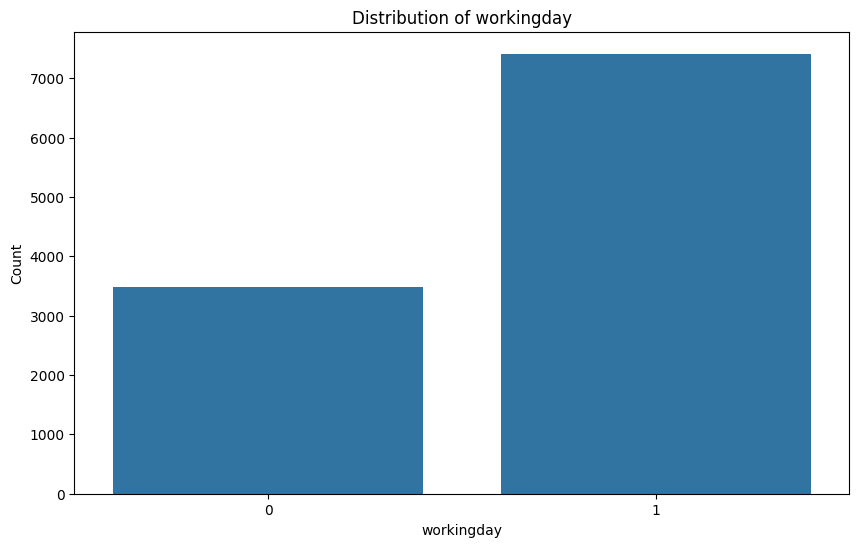

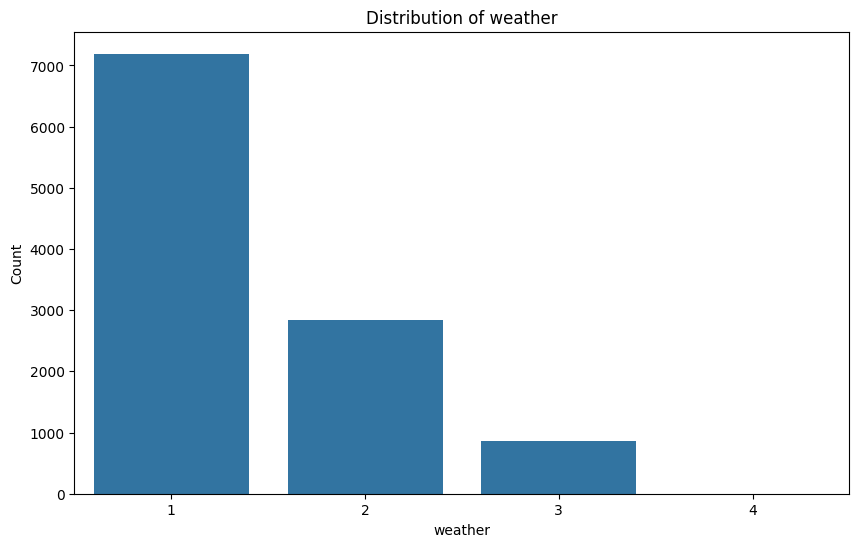

In [29]:
categorical_features = ['season', 'holiday', 'workingday', 'weather']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


# Pie chart for categorical features

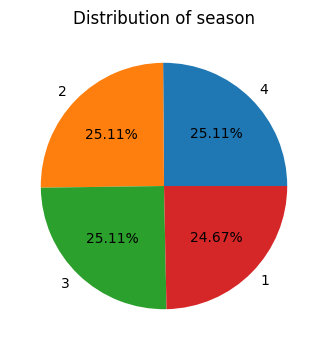

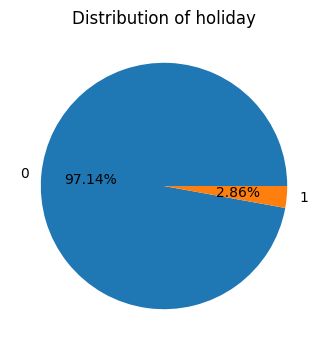

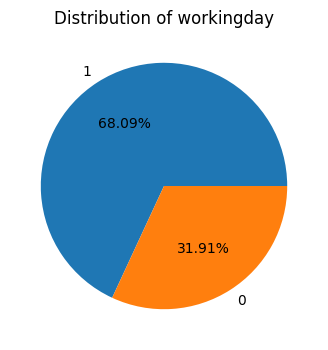

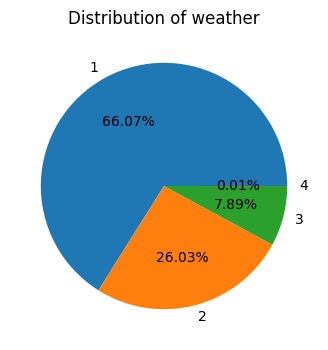

In [34]:
for feature in categorical_features:
    plt.figure(figsize=(4, 4))
    data[feature].value_counts().plot.pie(autopct='%2.2f%%')
    plt.title(f'Distribution of {feature}')
    plt.ylabel('')
    plt.show()

# Check for outliers

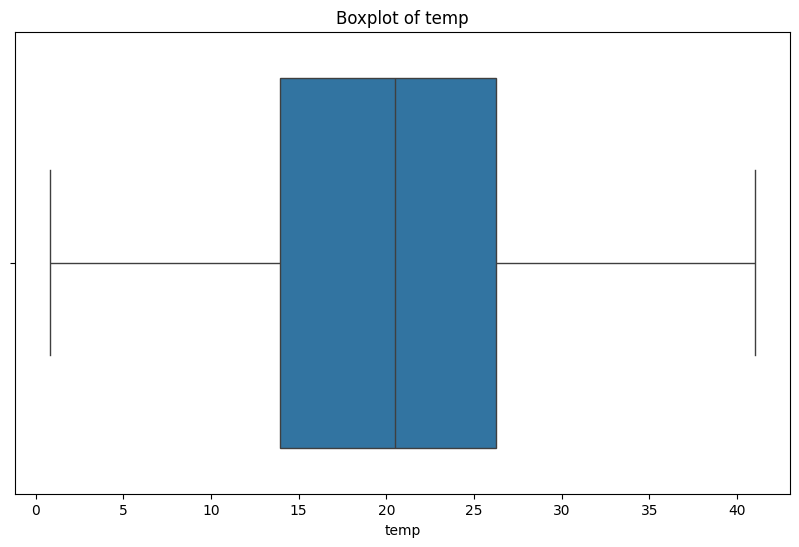

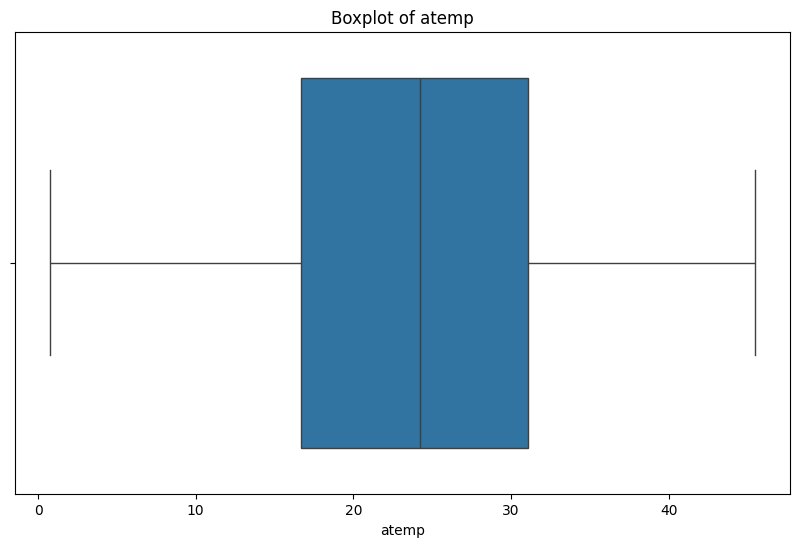

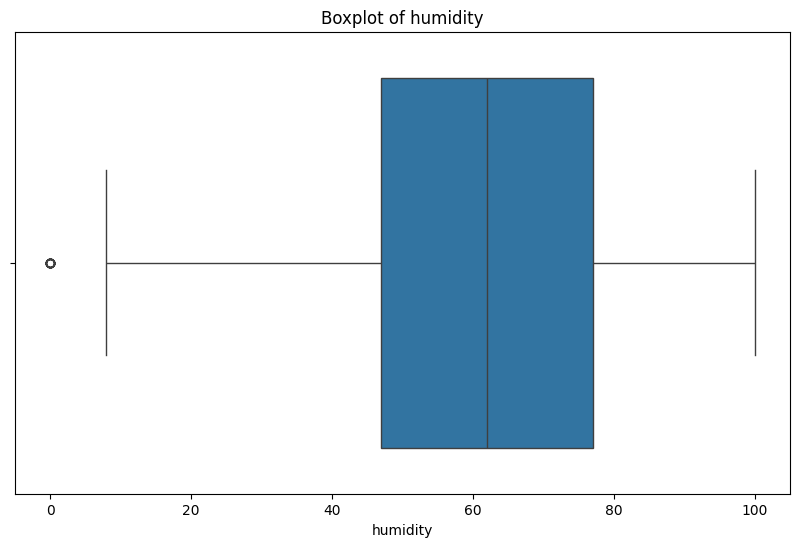

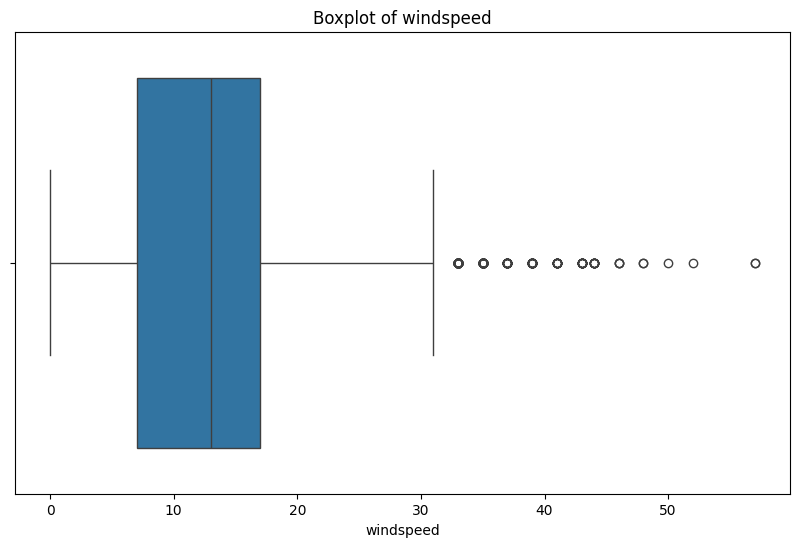

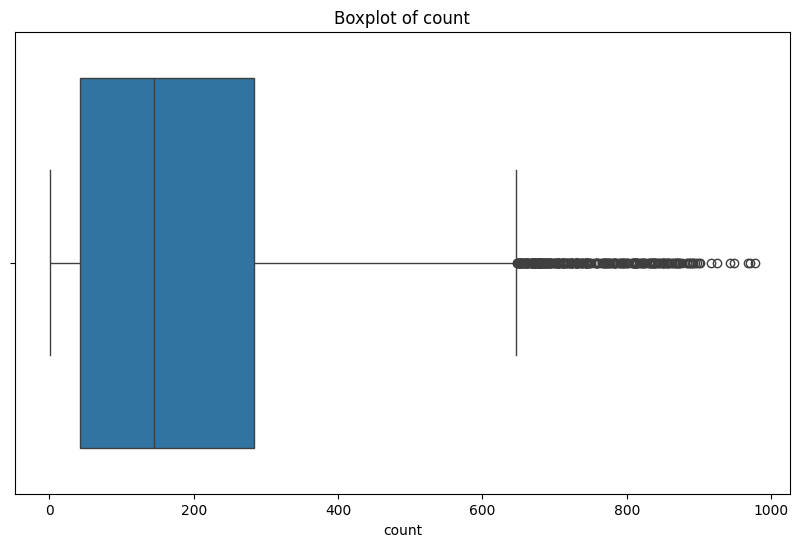

In [35]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

# Removing outliers using Interquartile Range (IQR)

In [36]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for feature in numerical_features:
    data = remove_outliers(data, feature)

In [37]:
print(data)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  hour  \
0      14.395        81     0.0000      

# Correlation Heatmap

count         1.000000
registered    0.966086
casual        0.717506
hour          0.428986
temp          0.384902
atemp         0.381641
datetime      0.261813
month         0.163929
season        0.161146
windspeed     0.127434
dayofweek     0.026295
holiday       0.006912
workingday   -0.025720
weather      -0.125115
humidity     -0.339174
Name: count, dtype: float64


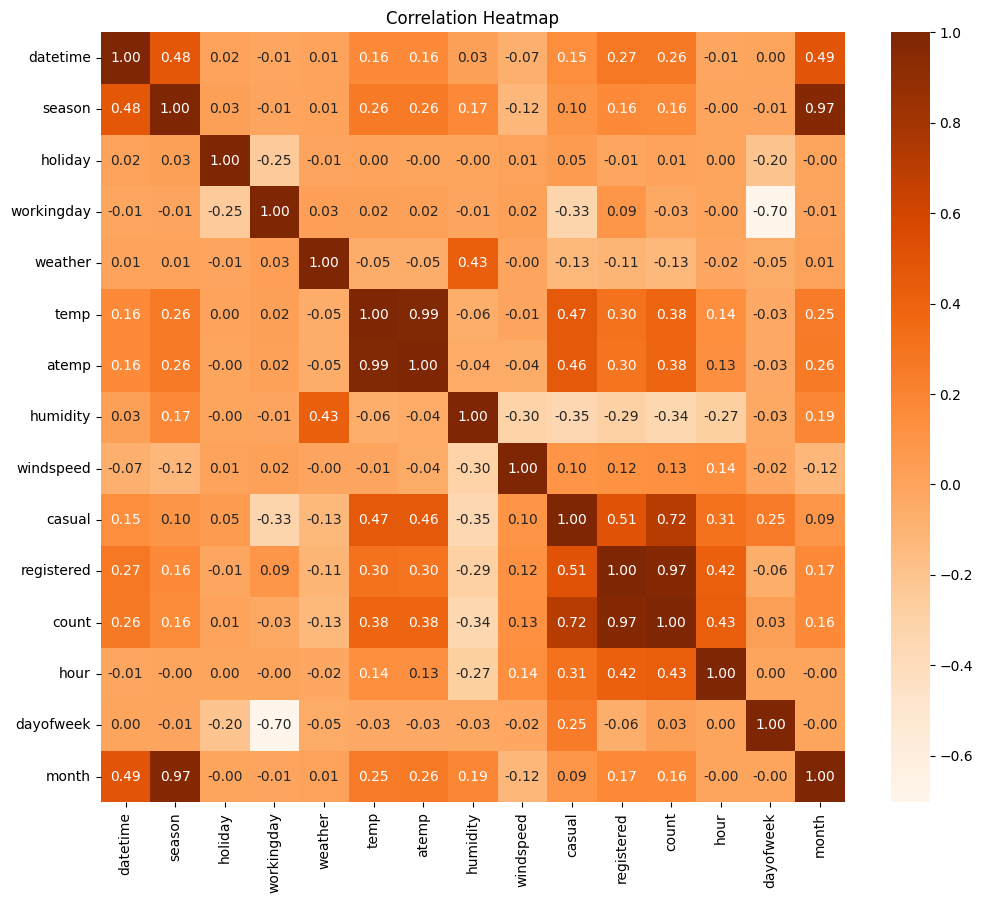

In [46]:
# Correlation Analysis
correlation_matrix = data.corr()
print(correlation_matrix['count'].sort_values(ascending=False))


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Weekdays Descriptive Statistics:
count    7295.000000
mean      173.944208
std       153.381371
min         1.000000
25%        38.000000
50%       143.000000
75%       264.000000
max       649.000000
Name: count, dtype: float64
Weekends Descriptive Statistics:
count    3057.000000
mean      182.147857
std       165.043489
min         1.000000
25%        43.000000
50%       125.000000
75%       296.000000
max       648.000000
Name: count, dtype: float64
T-Statistic: -2.3549397435584747
P-Value: 0.01856147437176565
Reject the Null Hypothesis (H0). There is a significant difference in the number of bike rides on weekdays and weekends.


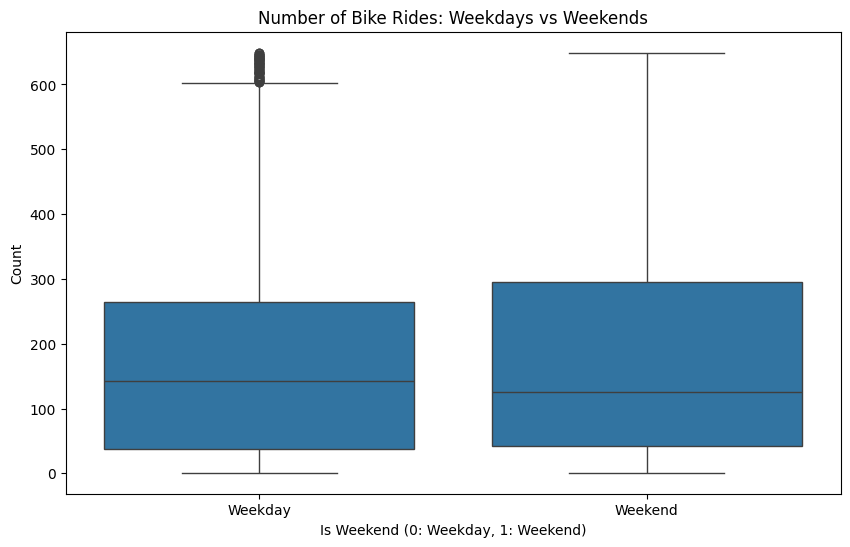

In [52]:
# Adding a new column to distinguish between weekdays and weekends
data['is_weekend'] = data['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Descriptive statistics for weekdays and weekends
weekdays = data[data['is_weekend'] == 0]['count']
weekends = data[data['is_weekend'] == 1]['count']

print("Weekdays Descriptive Statistics:")
print(weekdays.describe())

print("Weekends Descriptive Statistics:")
print(weekends.describe())

# Formulate Hypotheses
# H0: There is no significant difference in the number of bike rides on weekdays and weekends
# H1: There is a significant difference in the number of bike rides on weekdays and weekends

# Perform 2-sample independent t-test
t_stat, p_value = ttest_ind(weekdays, weekends, equal_var=False) # Welch's t-test

# Set significance level
alpha = 0.05

# Print test statistics and p-value
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Decision
if p_value <= alpha:
    print("Reject the Null Hypothesis (H0). There is a significant difference in the number of bike rides on weekdays and weekends.")
else:
    print("Fail to reject the Null Hypothesis (H0). There is no significant difference in the number of bike rides on weekdays and weekends.")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='count', data=data)
plt.title('Number of Bike Rides: Weekdays vs Weekends')
plt.xlabel('Is Weekend (0: Weekday, 1: Weekend)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

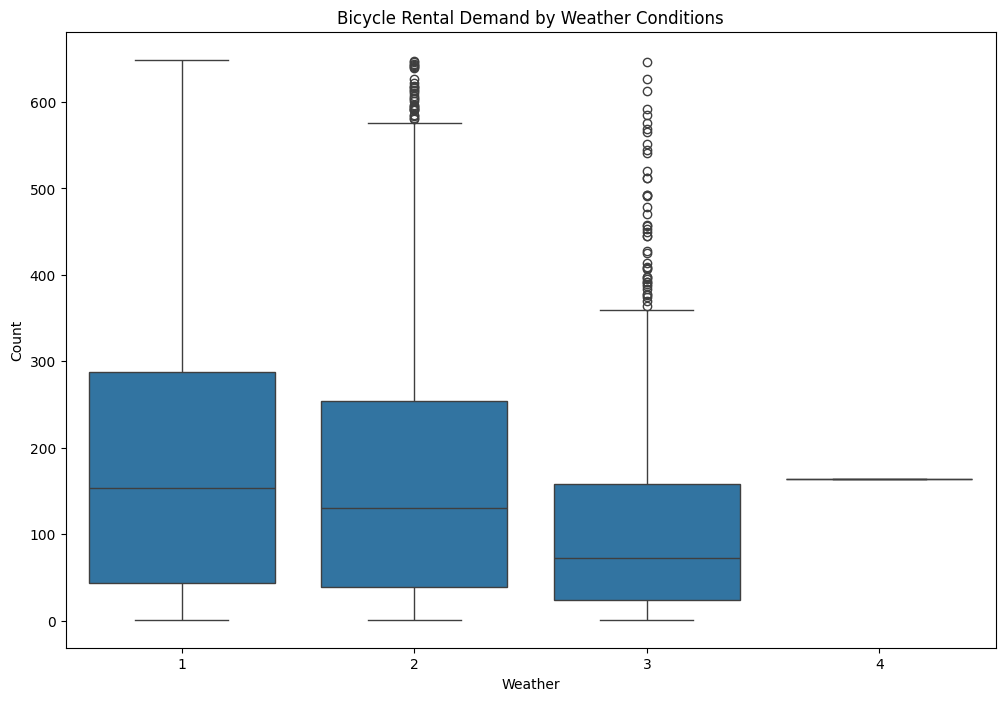

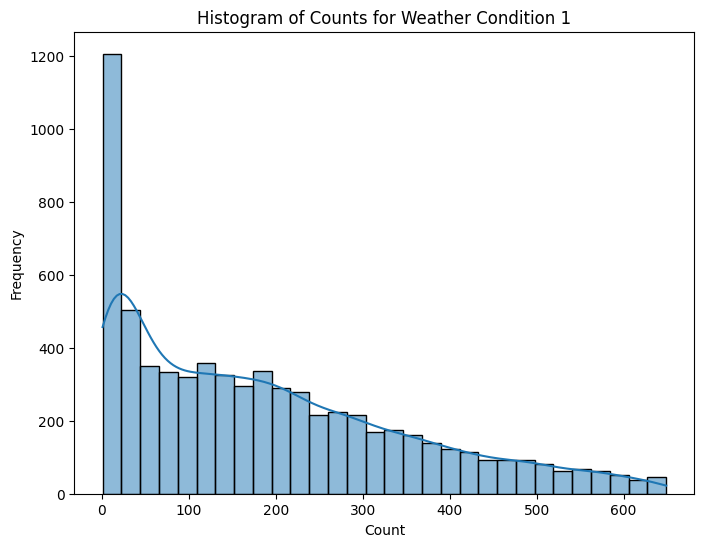

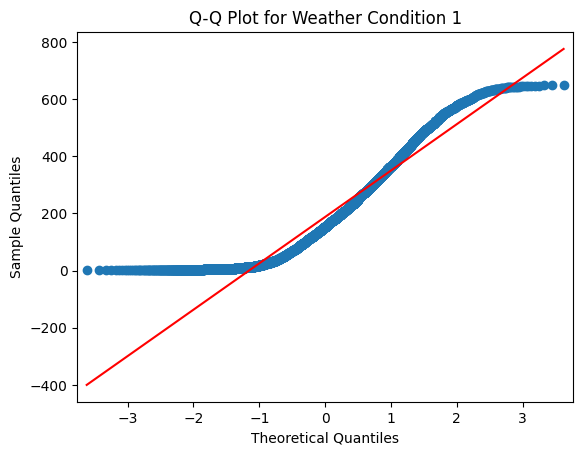

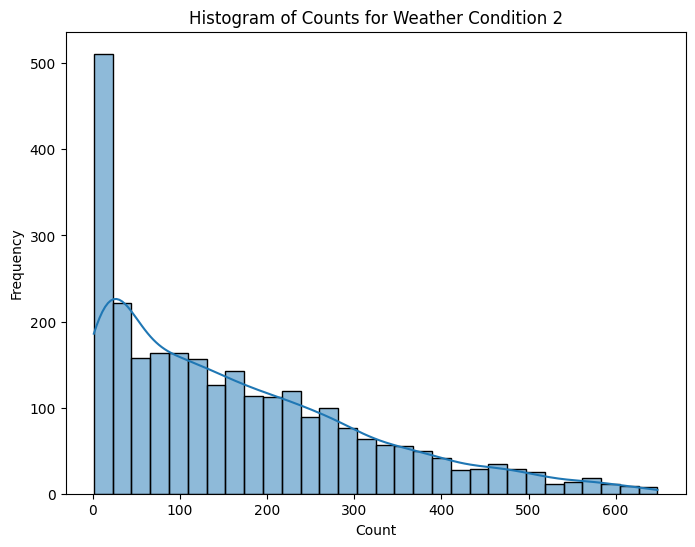

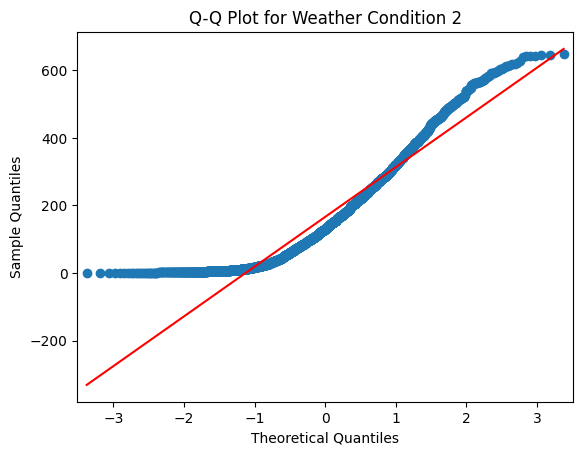

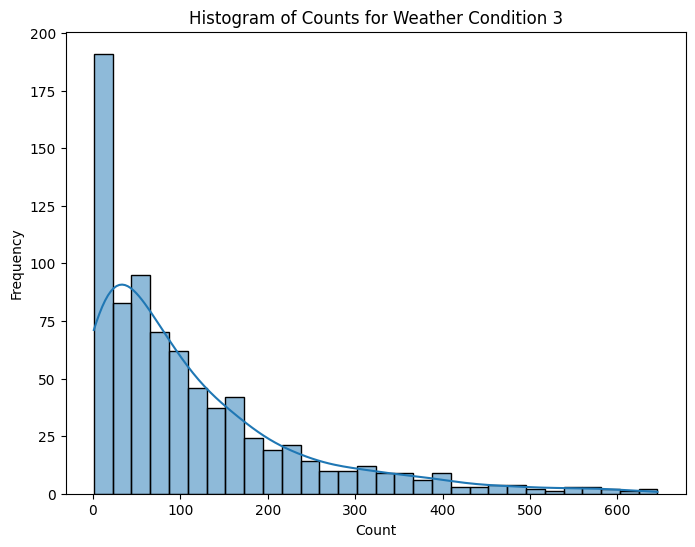

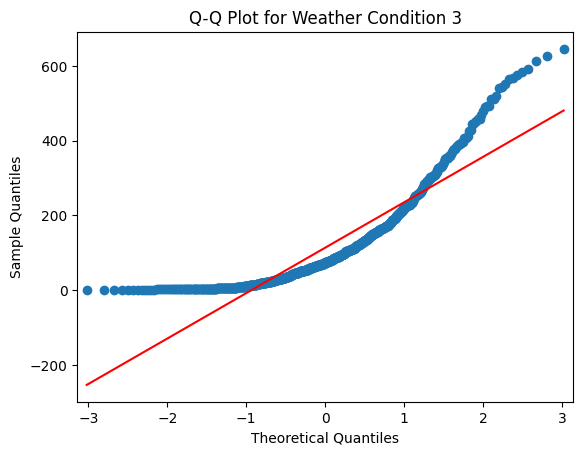

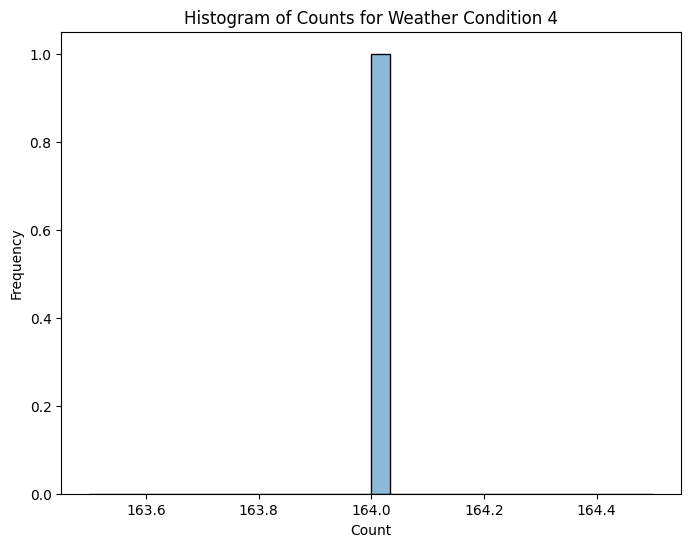

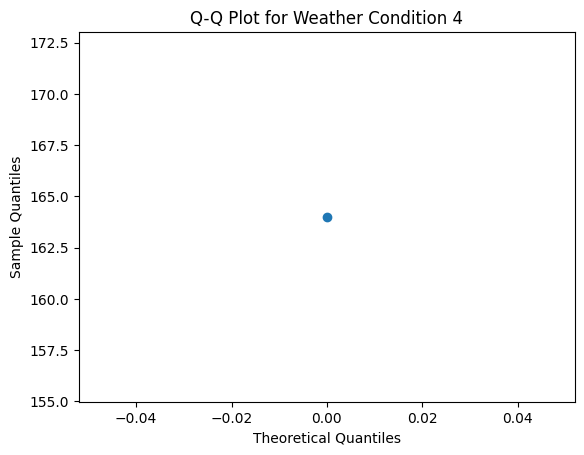

Levene’s Test: Statistics=57.402192545633945, p-value=8.559884668642734e-37
ANOVA Test: F-statistic=59.54931357405048, p-value=3.6712371414107037e-38
Reject the Null Hypothesis (H0). There is a significant difference in the demand for bicycles on rent for different weather conditions.


In [55]:
# Visualize the distribution of count for different weather conditions
plt.figure(figsize=(12, 8))
sns.boxplot(x='weather', y='count', data=data)
plt.title('Bicycle Rental Demand by Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

# Normality tests
weather_conditions = data['weather'].unique()
for condition in weather_conditions:
    samples = data[data['weather'] == condition]['count']
    plt.figure(figsize=(8, 6))
    sns.histplot(samples, bins=30, kde=True)
    plt.title(f'Histogram of Counts for Weather Condition {condition}')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

    # Q-Q Plot
    sm.qqplot(samples, line='s')
    plt.title(f'Q-Q Plot for Weather Condition {condition}')
    plt.show()



# Levene's test for equality of variances
stat, p = levene(data[data['weather'] == 1]['count'],
                 data[data['weather'] == 2]['count'],
                 data[data['weather'] == 3]['count'],
                 data[data['weather'] == 4]['count'])
print(f'Levene’s Test: Statistics={stat}, p-value={p}')

# One-way ANOVA test
anova_result = f_oneway(data[data['weather'] == 1]['count'],
                        data[data['weather'] == 2]['count'],
                        data[data['weather'] == 3]['count'],
                        data[data['weather'] == 4]['count'])
print(f'ANOVA Test: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}')

# Set significance level
alpha = 0.05

# Decision
if anova_result.pvalue <= alpha:
    print("Reject the Null Hypothesis (H0). There is a significant difference in the demand for bicycles on rent for different weather conditions.")
else:
    print("Fail to reject the Null Hypothesis (H0). There is no significant difference in the demand for bicycles on rent for different weather conditions.")



# Inferences and Conclusions
# Based on the results of the ANOVA test, we can conclude whether the weather conditions significantly affect bicycle rental demand.
# Further post-hoc analysis could be performed to determine which specific weather conditions differ from each other.

In [2]:
# Visualize the distribution of count for different seasons
plt.figure(figsize=(12, 8))
sns.boxplot(x='season', y='count', data=data)
plt.title('Bicycle Rental Demand by Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Normality tests
seasons = data['season'].unique()
for season in seasons:
    samples = data[data['season'] == season]['count']
    plt.figure(figsize=(8, 6))
    sns.histplot(samples, bins=30, kde=True)
    plt.title(f'Histogram of Counts for Season {season}')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

    # Q-Q Plot
    sm.qqplot(samples, line='s')
    plt.title(f'Q-Q Plot for Season {season}')
    plt.show()

    # Shapiro-Wilk Test
    stat, p = shapiro(samples)
    print(f'Season {season} - Shapiro-Wilk Test: Statistics={stat}, p-value={p}')

# Levene's test for equality of variances
stat, p = levene(data[data['season'] == 1]['count'],
                 data[data['season'] == 2]['count'],
                 data[data['season'] == 3]['count'],
                 data[data['season'] == 4]['count'])
print(f'Levene’s Test: Statistics={stat}, p-value={p}')

# One-way ANOVA test
anova_result = f_oneway(data[data['season'] == 1]['count'],
                        data[data['season'] == 2]['count'],
                        data[data['season'] == 3]['count'],
                        data[data['season'] == 4]['count'])
print(f'ANOVA Test: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}')

# Set significance level
alpha = 0.05

# Decision
if anova_result.pvalue <= alpha:
    print("Reject the Null Hypothesis (H0). There is a significant difference in the demand for bicycles on rent for different seasons.")
else:
    print("Fail to reject the Null Hypothesis (H0). There is no significant difference in the demand for bicycles on rent for different seasons.")



NameError: name 'plt' is not defined

In [64]:
# Formulate Hypotheses
# H0: The weather conditions are not significantly different during different seasons.
# H1: The weather conditions are significantly different during different seasons.

# Create a Contingency Table
contingency_table = pd.crosstab(data['season'], data['weather'],margins=True)
print(contingency_table)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Print test statistics and p-value
print(f"Chi-square Test Statistic: {chi2}")
print(f"P-Value: {p}")

# Decision
if p <= alpha:
    print("Reject the Null Hypothesis (H0). There is a significant difference in weather conditions during different seasons.")
else:
    print("Fail to reject the Null Hypothesis (H0). There is no significant difference in weather conditions during different seasons.")

# Inferences and Conclusions
# Based on the results of the chi-square test, we can conclude whether the weather conditions are significantly different across seasons.
# If rejected, it suggests that weather patterns vary by season.

weather     1     2    3  4    All
season                            
1        1648   696  185  1   2530
2        1687   679  213  0   2579
3        1838   575  185  0   2598
4        1648   783  214  0   2645
All      6821  2733  797  1  10352
Chi-square Test Statistic: 50.43710022728561
P-Value: 1.9524011414207827e-05
Reject the Null Hypothesis (H0). There is a significant difference in weather conditions during different seasons.


# Inferences and Conclusions
# Based on the results of the ANOVA test, we can conclude whether the seasons significantly affect bicycle rental demand.
# Further post-hoc analysis could be performed to determine which specific seasons differ from each other.

![]()

![]()


![](https://www.allaboutcircuits.com/uploads/articles/understanding-the-normal-distribution-parametric-tests-skewness-and-kurtosis-rk-aac-image2.jpg)


